In [3]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn import tree
import feather
from sklearn.model_selection import train_test_split
import graphviz
# import os
# os.environ["PATH"] += os.pathsep + '/anaconda3/lib/python3.6/site-packages/graphviz/'
# import sys
# sys.path.append("/anaconda3/lib/python3.6/site-packages/graphviz/")

In [100]:
year_by_year = feather.read_dataframe('./data')

In [101]:
year_by_year.columns.tolist()
#year_by_year[['TEAM_NAME', 'YEAR', 'CONF_COUNT', 'DIV_COUNT', 'NBA_FINALS_APPEARANCE']]
year_by_year

,TEAM_ID,TEAM_CITY,TEAM_NAME,YEAR,GP,WINS,LOSSES,WIN_PCT,CONF_RANK,DIV_RANK,...,OREB,DREB,REB,AST,PF,STL,TOV,BLK,PTS,PTS_RANK
0,1610612737,Tri-Cities,Blackhawks,1949-50,64,29,35,0.453,0,3,...,0.0,0.0,0.0,20.8,32.1,0.0,0.0,0.0,83.0,5
1,1610612737,Tri-Cities,Blackhawks,1950-51,68,25,43,0.368,0,5,...,0.0,0.0,0.0,21.7,30.8,0.0,0.0,0.0,84.3,6
2,1610612737,Milwaukee,Hawks,1951-52,66,17,49,0.258,0,5,...,0.0,0.0,0.0,18.6,28.0,0.0,0.0,0.0,73.2,10
3,1610612737,Milwaukee,Hawks,1952-53,71,27,44,0.380,0,5,...,0.0,0.0,0.0,20.1,29.9,0.0,0.0,0.0,75.9,9
4,1610612737,Milwaukee,Hawks,1953-54,72,21,51,0.292,0,4,...,0.0,0.0,0.0,18.0,24.6,0.0,0.0,0.0,70.0,9
5,1610612737,Milwaukee,Hawks,1954-55,72,26,46,0.361,0,4,...,0.0,0.0,0.0,21.4,26.4,0.0,0.0,0.0,87.4,8
6,1610612737,St. Louis,Hawks,1955-56,72,33,39,0.458,0,2,...,0.0,0.0,0.0,24.3,27.4,0.0,0.0,0.0,96.6,6
7,1610612737,St. Louis,Hawks,1956-57,72,34,38,0.472,0,1,...,0.0,0.0,0.0,20.2,25.7,0.0,0.0,0.0,98.5,6
8,1610612737,St. Louis,Hawks,1957-58,72,41,31,0.569,0,1,...,0.0,0.0,0.0,21.4,26.0,0.0,0.0,0.0,107.5,3
9,1610612737,St. Louis,Hawks,1958-59,72,49,23,0.681,0,1,...,0.0,0.0,0.0,21.8,26.9,0.0,0.0,0.0,108.8,4


In [102]:
features = [
 'GP',
 'WINS',
 'LOSSES',
 'WIN_PCT',
 'CONF_RANK',
 'DIV_RANK',
 'PO_WINS',
 'PO_LOSSES',
 'FGM',
 'FGA',
 'FG_PCT',
 'FG3M',
 'FG3A',
 'FG3_PCT',
 'FTM',
 'FTA',
 'FT_PCT',
 'OREB',
 'DREB',
 'REB',
 'AST',
 'PF',
 'STL',
 'TOV',
 'BLK',
 'PTS',
 'PTS_RANK'
]
X = year_by_year.loc[:, features]
X.shape


(1477, 27)

In [103]:
labels = ['NBA_FINALS_APPEARANCE']
y = year_by_year.loc[:, labels]
y.shape

(1477, 1)

In [104]:
team_tree = DecisionTreeClassifier()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25)
team_tree.fit(X_train, y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [105]:
print('scoring the tree based on the randomly splitted validation set')
team_tree.score(X_test, y_test)

scoring the tree based on the randomly splitted validation set


0.9702702702702702

'decision_tree.pdf'

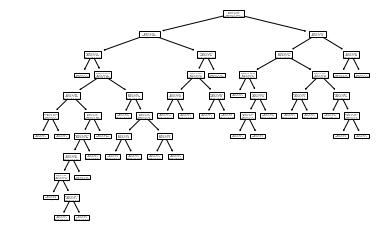

In [106]:
plot_tree(team_tree)
dot_data = tree.export_graphviz(team_tree, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("decision_tree")

In [107]:
y_finals = y_test.loc[y_test['NBA_FINALS_APPEARANCE'] != "N/A"]
# X_finals = X_test.loc[X_test['NBA_FINALS_APPEARANCE'] != "N/A"]
# X_finals
indicies = y_finals.index.values
x_finals = []
for index in indicies:
    x_finals.append(X_test.loc[index])
print("scoring the tree based on only teams that made the finals:")
team_tree.score(x_finals, y_finals)

scoring the tree based on only teams that made the finals:


0.75